In [1]:
#importing necessary packages

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from pathlib import Path
import os, pickle

Using TensorFlow backend.


In [2]:
#Loading pickle files

file_path_X = open(os.path.join(r"C:\Users\Intel\Desktop\VIT\Labelled Dataset - Fig 51\X.pickle"), 'rb')
file_path_Y = open(os.path.join(r"C:\Users\Intel\Desktop\VIT\Labelled Dataset - Fig 51\Y.pickle"), 'rb')
X = pickle.load(file_path_X)
y = pickle.load(file_path_Y)

In [3]:
number_of_classes = max(y) + 1 #Number of classes

In [4]:
X = X/255.0 #Normalising the images

In [5]:
print(X.shape)

(95, 50, 50, 1)


In [6]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten()) #Transforms all information from previous convolutions into inputs for neurons
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer for given number of classes
model.add(Dense(number_of_classes))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

Train on 85 samples, validate on 10 samples
Epoch 1/40
85/85 [==============================] - 3s 33ms/sample - loss: 3.2572 - acc: 0.0588 - val_loss: 3.2490 - val_acc: 0.0000e+00
Epoch 2/40
85/85 [==============================] - 0s 4ms/sample - loss: 3.2165 - acc: 0.0824 - val_loss: 3.2619 - val_acc: 0.0000e+00
Epoch 3/40
85/85 [==============================] - 0s 4ms/sample - loss: 3.1565 - acc: 0.0824 - val_loss: 3.2968 - val_acc: 0.0000e+00
Epoch 4/40
85/85 [==============================] - 0s 4ms/sample - loss: 3.1132 - acc: 0.0824 - val_loss: 3.3860 - val_acc: 0.0000e+00
Epoch 5/40
85/85 [==============================] - 0s 4ms/sample - loss: 3.0570 - acc: 0.1412 - val_loss: 3.4461 - val_acc: 0.3000
Epoch 6/40
85/85 [==============================] - 0s 4ms/sample - loss: 3.0418 - acc: 0.1294 - val_loss: 3.4054 - val_acc: 0.1000
Epoch 7/40
85/85 [==============================] - 0s 4ms/sample - loss: 2.9850 - acc: 0.2000 - val_loss: 3.3959 - val_acc: 0.1000
Epoch 8/40
85/8

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
__________

In [9]:
#Saving the model in local machine
model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


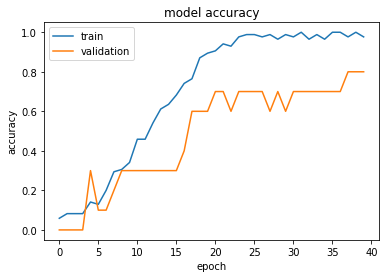

In [10]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')